<a href="https://colab.research.google.com/github/001ckk/RNN-and-Naive-Bayes/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KNN ON TITANIC DATA**

#**Introduction**

**Specifying the question**

A study to determine if a passanger on board the titanic survived the titanic accident.

**Metric of success**

Performing a KNN to determine if a passanger onboard the titanic survived the accident.

**Context**

This is data collected from the titanic.

**Data Relevance**

We are using train data from the titanic. The results we get from this can be used to predict if a passanger in the test data set survived the accident. Both datas can be found here [train data](https://archive.org/download/train5_202002/train%20%285%29.csv) and [test data](https://archive.org/download/test1_202002/test%20%281%29.csv)

**Key**

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = 
Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

#**Data Loading and Cleaning**

In [341]:
import pandas as pd 
import numpy as np 

In [342]:
# Loading the data 

test = pd.read_csv('titanic_test.csv')
data = pd.read_csv('titanic_train.csv')

In [343]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [346]:
# previewing the data 

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
# Checking duplicated values in the train data before cleaning si

In [348]:
print(list(test.columns))
print(list(data.columns))

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [349]:
# You may notice that the test data does not contain the 'survived' column.
# In that case we are using and training the train data to predict if an individual in the test data will either survive or not.

In [350]:
data.info()

# From this we can see that the data has 12 columns and 891 rows.
# There are several missing values in the rows.
# For this analysis there are also columns which will not be required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [351]:
# Checking for duplicate values in this data before dropping some columns since it will be majorly use the unique entries

data.duplicated().sum()

# There are no duplicate vales.

0

In [352]:
# Dropping columns I will not use in the analysis.
# Most columns are very unique and can not be used to make any patterns.

data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [353]:
# Checking for missing values.

data.isnull().sum()

# From this we can see that all the other columns do not have missing values other than the 'Age' and 'Embarked' column.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [354]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [355]:
# To remove the missing value in age, I will replace the null values with the mean age 

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [356]:
# Replacing the missing values in the 'Embarked' column with the mode entry.

data['Embarked'].fillna('S', inplace = True)

In [357]:
# Checking outliers in the data 

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q1 - 1.5*iqr))|(data > (q3 + 1.5*iqr)))]
# 
print(outliers.count())
print('****')
#
print(outliers.max())
print('****')
#
print(outliers.min())

# Looking at these values, there is not need to drop any outliers since they are all within a reasonable range from the minimum and maximum 

Survived      0
Pclass        0
Sex           0
Age          66
SibSp        46
Parch       213
Fare        116
Embarked      0
dtype: int64
****
Survived         NaN
Pclass           NaN
Sex             None
Age             80.0
SibSp            8.0
Parch            6.0
Fare        512.3292
Embarked        None
dtype: object
****
Survived     NaN
Pclass       NaN
Sex         None
Age         0.42
SibSp        3.0
Parch        1.0
Fare        66.6
Embarked    None
dtype: object


This is the refined data that I will use.

#**Exploratory Data Analysis**

**Univariate Analysis**

In [358]:
# Label encoding the sex and embarked columns.

data1 = data[['Sex','Embarked']]

from sklearn.preprocessing import LabelEncoder

data1_enc = data1.copy()
enc = LabelEncoder()

for col in list(data1_enc.columns):
  data1_enc[col] = enc.fit_transform(data1_enc[col])
data1_enc

# returning these columns to the original columns

data2 = data.drop(['Sex','Embarked'], axis = 1)
data2[['Sex','Embarked']] = data1_enc
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [359]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Sex       891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


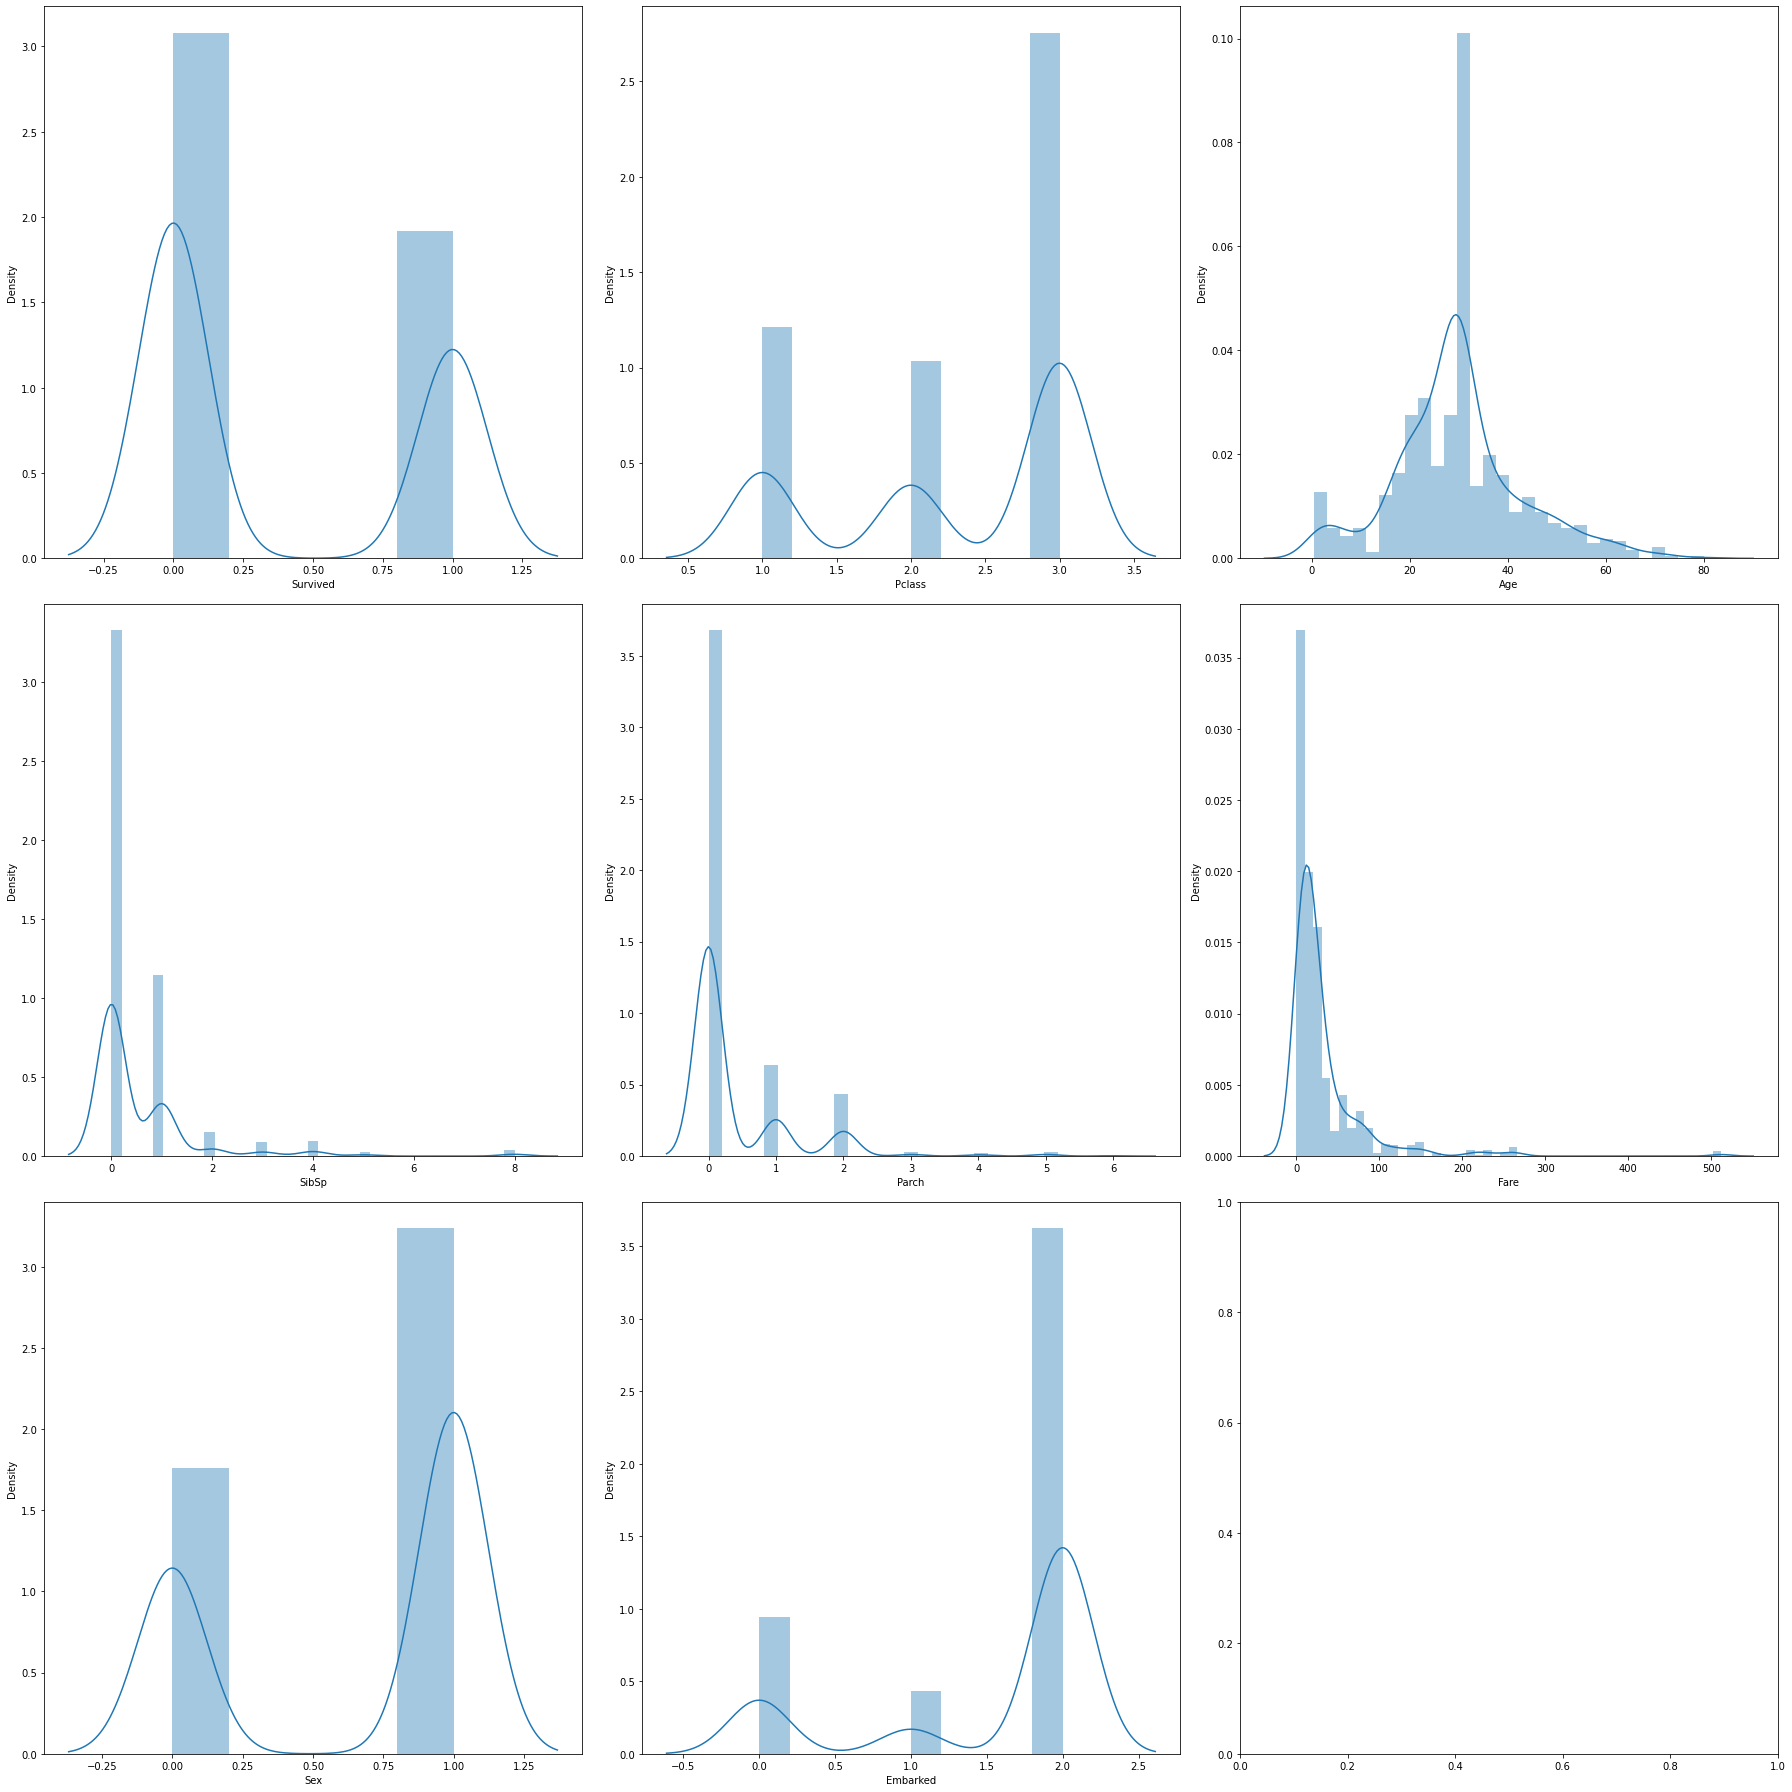

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

var = data2.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))

for col, ax in zip(var, axes.flatten()):


  sns.distplot(data2[col], hist=True, ax=ax)

plt.tight_layout();

# This shows the counts on each of the columns

**Multivariate Analysis**

In [361]:
# Label encoding the sex and embarked columns.

data1 = data[['Sex','Embarked']]

from sklearn.preprocessing import LabelEncoder

data1_enc = data1.copy()
enc = LabelEncoder()

for col in list(data1_enc.columns):
  data1_enc[col] = enc.fit_transform(data1_enc[col])
data1_enc

# returning these columns to the original columns

data2 = data.drop(['Sex','Embarked'], axis = 1)
data2[['Sex','Embarked']] = data1_enc
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


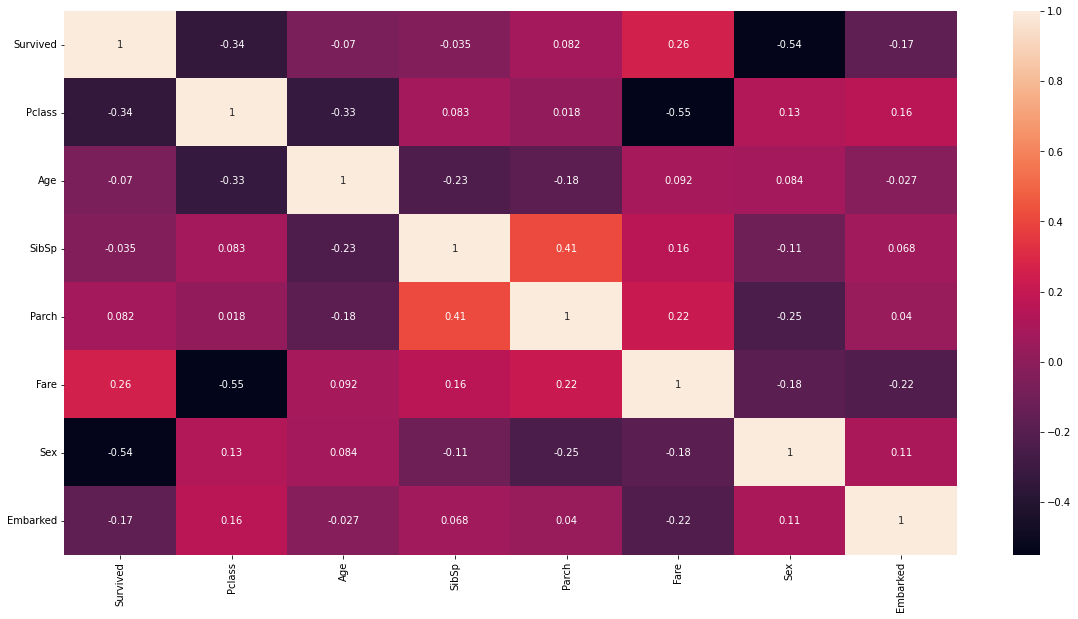

In [362]:
# Showing the correlation between the columns/ variables.

import seaborn as sns

sns.heatmap(data2.corr(),annot=True)
plt.gcf().set_size_inches(20,10)
plt.show()

# The variables are not even that correlated.

From this there is a high correlation between 'sex and survived' and 'pclass and fare'.

This is also seen in the VIF.

I will not be dropping the sex column.

I have decided to drop the fare column as this information is also in the pclass column. 

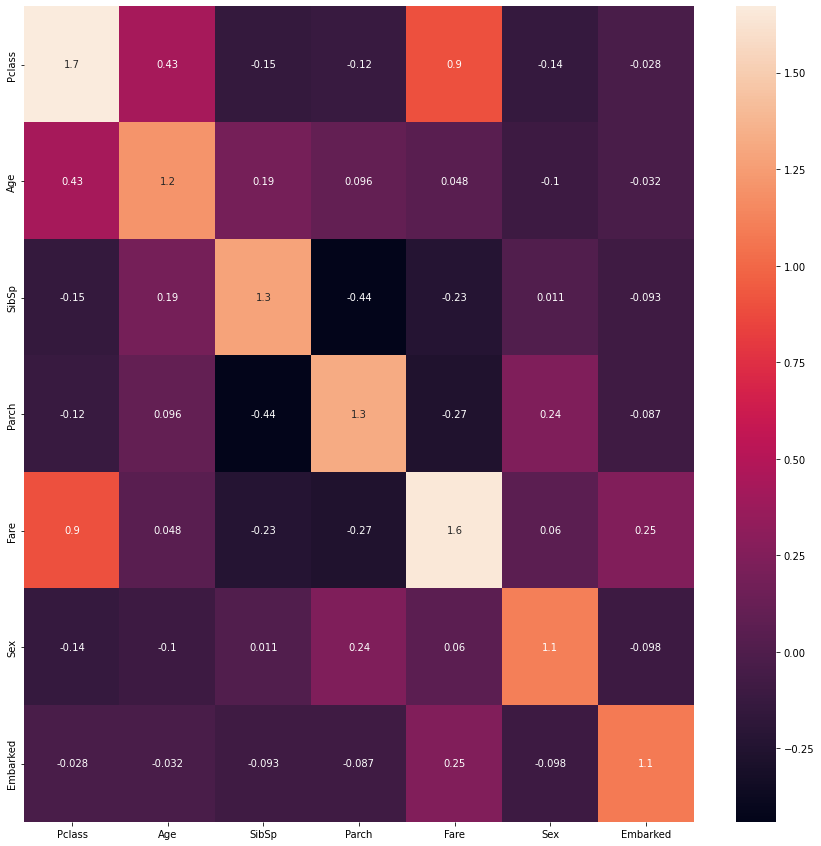

In [363]:
# VIF 

#check for VIF variance inflation factor using a correlation matrix

vif_matrix = data2.drop('Survived', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

# VIF's look good, no need to drop any column.


#**KNN**

In [364]:
data = data2

In [373]:
# Splitting the data 
from sklearn.model_selection import train_test_split

x = data[['Pclass','Sex','Age','SibSp','Parch']].values
y = data['Survived'].values

**test_size = 0.2**

In [374]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [376]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [377]:
y_pred = clf.predict(x_test)

In [378]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179

[[94 11]
 [26 48]]
model accuracy 0.7932960893854749


**test_size = 0.3**

In [379]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.83      0.64      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

[[142  15]
 [ 40  71]]
model accuracy 0.7947761194029851


**test_size = 0.4**

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       216
           1       0.81      0.63      0.71       141

    accuracy                           0.80       357
   macro avg       0.80      0.77      0.78       357
weighted avg       0.80      0.80      0.79       357

[[195  21]
 [ 52  89]]
model accuracy 0.7955182072829131


#**Conclusion**

The test_size of 0.2 is the best in this case as it has the best model accuracy.

#**Follow up questions**

**a). Did we have the right data?** 

**b). Do we need other data to answer our question?**

**c). Did we have the right question?**